# RN básicas para clasificación con TF y Keras

In [1]:
# Bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Carga base de datos
fashion_mnist = tf.keras.datasets.fashion_mnist

# Conjuntos de entrenamiento y prueba
(imagenes_entrenamiento,etiquetas_entrenamiento), (imagenes_prueba,
                                                   etiquetas_prueba) = \
                                                   fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Las etiquetas indican el tipo de prenda que es cada imagen.

Es necesario vertificar algunos objetos de ambos conjuntos con su etiqueta para ver si son correctos.

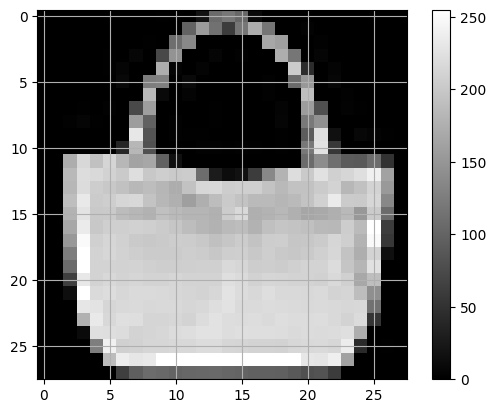

In [3]:
# Figura para visualizar imagen
plt.figure()

# Mostrar dentro de la figura la imagen que forma parte del entrenamiento en
# escala de grises
plt.imshow(imagenes_entrenamiento[100],cmap='gray',vmin=0,vmax=255)
plt.colorbar()
plt.grid(True)

In [4]:
# Valor de la etiqueta
print(etiquetas_entrenamiento[100])

8


Donde:
- 0 : Playeras
- 1 : Pantalones
- 2 : Suéteres
- 3 : Vestidos
- 4 : Abrigos
- 5 : Sandalias
- 6 : Camisas
- 7 : Tenis
- 8 : Bolsas
- 9 : Botas

In [5]:
# Tamaño de los conjuntos
print(imagenes_entrenamiento.shape)
print(imagenes_prueba.shape)

(60000, 28, 28)
(10000, 28, 28)


Se hará un **arreglo de clases**, se utiliza para descubrir de forma textual a que se refiere cada una de las imágenes dentro de la base. Es la interpretación de alto nivel a la información que cualquier persona podría entender.

vestido


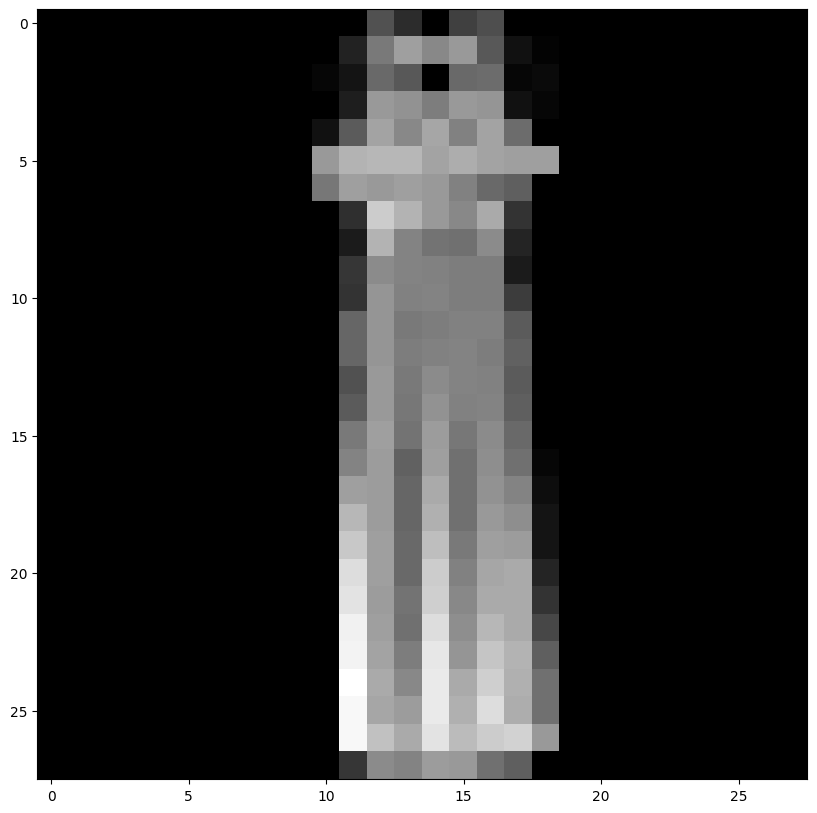

In [6]:
clases = ['playera','pantalon','sueter','vestido','abrigo','sandalia','camisa',
          'tenis','bolsa','botas']
plt.figure(figsize=(10,10))
plt.imshow(imagenes_entrenamiento[250],cmap='gray',vmin=0,vmax=255)
print(clases[etiquetas_entrenamiento[250]])

La empresa solo quiere identificar dos prendas: playeras y pandatlones. Para este caso, la neurona final podría determinar si la imagen de entrada pertenece a una clase u otra.

Un valor cercano a 0 indicaría una playera, mientras que uno cercano a 1, indicaría un pantalón.

Al tener más de 10 clases, la mejor opción es tener una **neurona de salida por cada clase **, es decir, 10 por capa de salida.

Para las capas ocultas no existe una recomendación o proceso definido.
Es viable utilizar capas ocultas para reducir el número de nodos que hay en la capa de entrada

In [7]:
# Modelo
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)), # Capa entrada
    tf.keras.layers.Dense(196,activation='relu'), # capa oculta
    tf.keras.layers.Dense(10,activation='softmax') # Capa de salida
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Normalizar datos
imagenes_entrenamiento = imagenes_entrenamiento/255
imagenes_prueba = imagenes_prueba/255

In [9]:
#Resumen de la arquitectua de la red neuronal
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 196)            │       153,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,830 (608.71 KB)

 Trainable params: 155,830 (608.71 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Función de pérdida
modelo.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
# Entrenamiento
modelo.fit(imagenes_entrenamiento
           ,etiquetas_entrenamiento,
           epochs=10,
           batch_size=1
)


Epoch 1/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.7847 - loss: 0.6027
Epoch 2/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.8520 - loss: 0.4215
Epoch 3/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.8637 - loss: 0.3942
Epoch 4/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 132s 2ms/step - accuracy: 0.8668 - loss: 0.3874
Epoch 5/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.8734 - loss: 0.3738
Epoch 6/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 133s 2ms/step - accuracy: 0.8745 - loss: 0.3713
Epoch 7/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.8824 - loss: 0.3485
Epoch 8/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 135s 2ms/step - accuracy: 0.8806 - loss: 0.3556
Epoch 9/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - accuracy: 0.8824 - loss: 0.3495
Epoch 10/10
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 137s 2ms/step - accuracy: 0.8840 - loss: 0.3418


El siguiente parámetro especifica cuantas veces se realizará el proceso de entrenamiento considerando la totalidad de imágenes dentro la base de datos.
```
epochs
```

El siguiente parámetro especifica el tamaño del lote, cada cuantas imágenes tenemos que pasar por el modelo para actualizar los pesos y sesgos.
Cada vez que pase una imagen por la red neuronal se actualizarán los pesos y segos 60,000 veces.

```
batch_size
```






# Evaluación de un modelo inteligente y la transición hacia las redes neuronales convolucionales

In [12]:
perdida_prueba, exactitud_prueba = modelo.evaluate(
    imagenes_prueba,etiquetas_prueba,batch_size=1,verbose=1
)
print('Conjunto de prueba exactitud:', exactitud_prueba)
print('Conjunto de prueba perdida:', perdida_prueba)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8500 - loss: 0.5115
Conjunto de prueba exactitud: 0.8531000018119812
Conjunto de prueba perdida: 0.5092425346374512


La primera línea: Valor de la función de pérdida y la exactitud.


In [13]:
# Predicciones
predicciones = modelo.predict(imagenes_prueba)
print(imagenes_prueba.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 28, 28)


In [14]:
print('Vector de salida de la red:', predicciones[20])
print('Indice del argumento mayor:', np.argmax(predicciones[20]))
print('Clase predicha:', clases[np.argmax(predicciones[20])])

Vector de salida de la red: [5.2317773e-04 6.5503277e-15 9.9947608e-01 3.4058903e-26 3.2630961e-08
 6.3752380e-26 7.2207717e-07 0.0000000e+00 1.2327408e-12 3.9624776e-34]
Indice del argumento mayor: 2
Clase predicha: sueter


Clase real a la que pertence la imagen: sueter


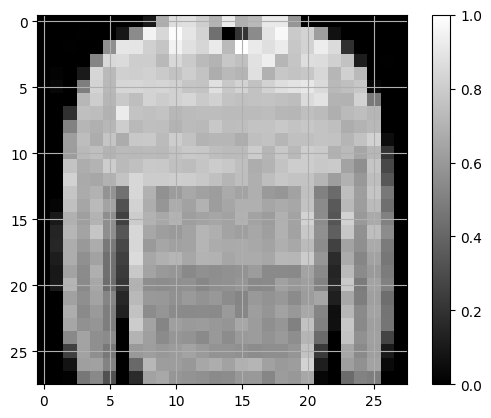

In [15]:
plt.figure()
plt.imshow(imagenes_prueba[20],cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.grid(True)
print('Clase real a la que pertence la imagen:', clases[etiquetas_prueba[20]])

In [16]:
indice_incorrecto = 1008
print('Vector de salida de la red:', predicciones[indice_incorrecto])
print('Indice del argumento mayor:', np.argmax(predicciones[indice_incorrecto]))
print('Clase predicha:', clases[np.argmax(predicciones[indice_incorrecto])])
print('Clase real:', clases[etiquetas_prueba[indice_incorrecto]])

Vector de salida de la red: [2.5426203e-01 1.7572322e-05 2.7559116e-01 1.1162332e-01 3.7633665e-02
 2.1740605e-04 2.3801608e-01 7.9658581e-03 7.4542150e-02 1.3067191e-04]
Indice del argumento mayor: 2
Clase predicha: sueter
Clase real: camisa


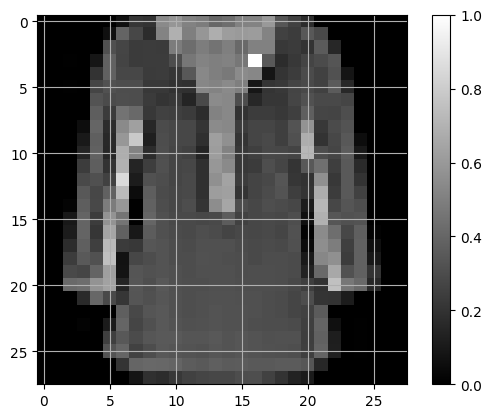

In [17]:
plt.figure()
plt.imshow(imagenes_prueba[indice_incorrecto],cmap='gray',vmin=0,vmax=1)
plt.colorbar()
plt.grid(True)

In [18]:
# Identificación de errores y aciertos
num_imagenes = len(etiquetas_prueba)
num_ima_correcta = 0
for i in range(num_imagenes):
    if np.argmax(predicciones[i]) == etiquetas_prueba[i]:
        num_ima_correcta += 1

print('# de imágenes del conjunto de prueba clasificadas correctamente', num_ima_correcta)
print('Exactitud es igual al # de imágenes bien clasificadas entre total del conjunto',
      num_ima_correcta/num_imagenes)

# de imágenes del conjunto de prueba clasificadas correctamente 8531
Exactitud es igual al # de imágenes bien clasificadas entre total del conjunto 0.8531


Regresando a la situación de la empresa fabricante de ropa, tienes una nueva base de datos de imágenes etiquetadas, con ejemplos de estas 10 prendas de ropa, y las prendas se encuentran en diferentes áreas dentro de la imagen, con diversos colores, orientaciones y formas. La base de datos completa tiene 100,000 imágenes con un tamaño de 50x50 a color, el 80% es para entrenamiento y el 20% para pruebas.

Si bien, no existe una guía paso a paso de las características o configuración para las capas convolucionales o de max-pooling del modelo, si puedes construir una red para trabajar con imágenes de entrada de 50x50 y considerar tres capas convolucionales intercaladas con 2 capas de max-pooling, como una posible arquitectura inicial. Para ejemplificar esto, a continuación, analiza el bloque de código 1 y 2.

In [19]:
modeloConv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(50,(3,3),activation='relu',input_shape=(50,50,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(100,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(100,(3,3),activation='relu')
])
modeloConv.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 100)      │        90,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,600 (533.59 KB)

 Trainable params: 136,600 (533.59 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
modeloConv.add(tf.keras.layers.Flatten())
modeloConv.add(tf.keras.layers.Dense(128,activation='relu'))
modeloConv.add(tf.keras.layers.Dense(10))
modeloConv.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 100)      │        90,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8100)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,036,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,174,818 (4.48 MB)

 Trainable params: 1,174,818 (4.48 MB)

 Non-trainable params: 0 (0.00 B)